# Conférences Python Master TIDE #3

## A) Taux de change

On va s'intéresser au dataset des cours des devises de la Banque de France :
- https://webstat.banque-france.fr/fr/#/node/5385566

Les données sont dans le fichier `Webstat_Export.csv`.

L'idée est de charger les données, de les nettoyer et de pouvoir accéder aux cours de certaines devises à partir de leur code ISO3. On retiendra uniquement les colonnes se terminant effectivement par un code ISO3 entre parenthèses. Par ex., "Dollar des Etats-Unis (USD)".

1) Charger le fichier dans un DataFrame dont l'index doit correspondre aux dates, triées dans l'ordre chronologique et les colonnes doivent être les codes ISO3 des devises.

2) Sélectionner les devises : ['USD', 'CHF', 'GBP', 'JPY', 'TRY', 'CNY']

3) Calculer la moyenne des taux de change par année. Voir les codes de resampling : https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

4) Faire des graphiques avec :
- Les taux de change divisés par leur moyenne.
- Les taux de change divisés par leur moyenne avec une moyenne glissante de 30 jours ou bien un maximum glissant de 100 jours.
- Les taux de change divisés par la dernière valeur connue avec une moyenne glissante de 30 jours.

5) Réindexer le DataFrame en prenant toutes les dates et compléter les valeurs manquantes par interpolation linéaire.

6) Avec la librairie **sparklines** afficher un DataFrame avec la moyenne annuelle des taux de change pour une monnaie donnée ainsi que la tendance par trimestre.

```python
import sparklines

print(sparklines.sparklines(pd.Series(range(8)))[0])
```

## B) Données télécom

Dataset des opérateurs télécom : `couverture-2g-3g-4g-en-france-par-operateur-juillet-2015.csv`

1) Chargez le fichier dans un DataFrame.

2) Transformez ce DataFrame large en un DataFrame long en isolant les colonnes d'identification d'une part et les colonnes de valeurs de couverture d'autre part.

3) Rajoutez 3 colonnes "Opérateur", "Type Couverture" et "Réseau" calculées à partir de la colonne "variable" obtenue en 2.

4) Chargez le DataFrame des communes déjà utilisé et effectuez une jointure sur le code INSEE.

6) Pour le réseau 4G et la couverture surfacique, calculez la moyenne des couvertures par statut de commune et par opérateur. Pour quel couple (statut, opérateur) a-t-on la moyenne de la couverture la plus faible ?

## C) Données de formations

Dataset : `ListeOF.zip`

1) Charger le fichier dans un DataFrame.

2) A partir du nombre de valeurs non nulles des colonnes, styliser un DataFrame avec une barre de couleur.

3) A partir du pourcentage de remplissage des colonnes arrondi à un chiffre, styliser un DataFrame avec une colormap.

&copy; Francis Wolinski 2025

In [2]:
import numpy as np
import pandas as pd

In [20]:
df = pd.read_csv("./data/Webstat_Export.csv",
                 sep=";",
                 header=2,
                 na_values=["", "-"],
                 keep_default_na=False,
                 decimal=",",
                 parse_dates=[0],
                 date_format="%d/%m/%Y")

cols = [col for col in df.columns if (col == df.columns[0]) or (col.startswith("EXR.D.") and col.endswith(".EUR.SP00.A"))]

df = df[cols]

dico_cols = {col:col[6:9] for col in df.columns if col.startswith("EXR.D.") and col.endswith(".EUR.SP00.A")}
dico_cols[df.columns[0]] = "Date"

df = df.rename(columns=dico_cols)

df = df.set_index("Date")

df = df.sort_index()

df

,AUD,BGN,BRL,CAD,CHF,CNY,CYP,CZK,DKK,EEK,...,RON,RUB,SEK,SGD,SIT,SKK,THB,TRY,USD,ZAR
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,15.6466,...,1.3111,25.2875,9.4696,1.9554,189.045,42.991,42.6799,0.3723,1.1789,6.9358
1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,15.6466,...,1.3168,26.5876,9.4025,1.9655,188.775,42.848,42.5048,0.3728,1.1790,6.7975
1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,15.6466,...,1.3168,27.4315,9.3050,1.9699,188.700,42.778,42.6949,0.3722,1.1743,6.7307
1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,15.6466,...,1.3092,26.9876,9.1800,1.9436,188.800,42.765,42.1678,0.3701,1.1632,6.8283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-13,1.6305,1.9558,5.5486,1.4757,0.9784,7.8095,NaN,24.779,7.4608,NaN,...,4.9762,NaN,11.7000,1.4605,NaN,NaN,39.6880,34.7702,1.0795,19.8185


In [17]:
cols = [col for col in df.columns if (col == df.columns[0]) or (col.startswith("EXR.D.") and col.endswith(".EUR.SP00.A"))]
cols

['Code série :',
 'EXR.D.AUD.EUR.SP00.A',
 'EXR.D.BGN.EUR.SP00.A',
 'EXR.D.BRL.EUR.SP00.A',
 'EXR.D.CAD.EUR.SP00.A',
 'EXR.D.CHF.EUR.SP00.A',
 'EXR.D.CNY.EUR.SP00.A',
 'EXR.D.CYP.EUR.SP00.A',
 'EXR.D.CZK.EUR.SP00.A',
 'EXR.D.DKK.EUR.SP00.A',
 'EXR.D.EEK.EUR.SP00.A',
 'EXR.D.GBP.EUR.SP00.A',
 'EXR.D.HKD.EUR.SP00.A',
 'EXR.D.HRK.EUR.SP00.A',
 'EXR.D.HUF.EUR.SP00.A',
 'EXR.D.IDR.EUR.SP00.A',
 'EXR.D.ILS.EUR.SP00.A',
 'EXR.D.INR.EUR.SP00.A',
 'EXR.D.ISK.EUR.SP00.A',
 'EXR.D.JPY.EUR.SP00.A',
 'EXR.D.KRW.EUR.SP00.A',
 'EXR.D.LTL.EUR.SP00.A',
 'EXR.D.LVL.EUR.SP00.A',
 'EXR.D.MTL.EUR.SP00.A',
 'EXR.D.MXN.EUR.SP00.A',
 'EXR.D.MYR.EUR.SP00.A',
 'EXR.D.NOK.EUR.SP00.A',
 'EXR.D.NZD.EUR.SP00.A',
 'EXR.D.PHP.EUR.SP00.A',
 'EXR.D.PLN.EUR.SP00.A',
 'EXR.D.RON.EUR.SP00.A',
 'EXR.D.RUB.EUR.SP00.A',
 'EXR.D.SEK.EUR.SP00.A',
 'EXR.D.SGD.EUR.SP00.A',
 'EXR.D.SIT.EUR.SP00.A',
 'EXR.D.SKK.EUR.SP00.A',
 'EXR.D.THB.EUR.SP00.A',
 'EXR.D.TRY.EUR.SP00.A',
 'EXR.D.USD.EUR.SP00.A',
 'EXR.D.ZAR.EUR.SP00.A']

In [16]:
dico_cols = {col:col[6:9] for col in df.columns if col.startswith("EXR.D.") and col.endswith(".EUR.SP00.A")}
dico_cols[df.columns[0]] = "Date"
dico_cols

{'EXR.D.AUD.EUR.SP00.A': 'AUD',
 'EXR.D.BGN.EUR.SP00.A': 'BGN',
 'EXR.D.BRL.EUR.SP00.A': 'BRL',
 'EXR.D.CAD.EUR.SP00.A': 'CAD',
 'EXR.D.CHF.EUR.SP00.A': 'CHF',
 'EXR.D.CNY.EUR.SP00.A': 'CNY',
 'EXR.D.CYP.EUR.SP00.A': 'CYP',
 'EXR.D.CZK.EUR.SP00.A': 'CZK',
 'EXR.D.DKK.EUR.SP00.A': 'DKK',
 'EXR.D.EEK.EUR.SP00.A': 'EEK',
 'EXR.D.GBP.EUR.SP00.A': 'GBP',
 'EXR.D.HKD.EUR.SP00.A': 'HKD',
 'EXR.D.HRK.EUR.SP00.A': 'HRK',
 'EXR.D.HUF.EUR.SP00.A': 'HUF',
 'EXR.D.IDR.EUR.SP00.A': 'IDR',
 'EXR.D.ILS.EUR.SP00.A': 'ILS',
 'EXR.D.INR.EUR.SP00.A': 'INR',
 'EXR.D.ISK.EUR.SP00.A': 'ISK',
 'EXR.D.JPY.EUR.SP00.A': 'JPY',
 'EXR.D.KRW.EUR.SP00.A': 'KRW',
 'EXR.D.LTL.EUR.SP00.A': 'LTL',
 'EXR.D.LVL.EUR.SP00.A': 'LVL',
 'EXR.D.MTL.EUR.SP00.A': 'MTL',
 'EXR.D.MXN.EUR.SP00.A': 'MXN',
 'EXR.D.MYR.EUR.SP00.A': 'MYR',
 'EXR.D.NOK.EUR.SP00.A': 'NOK',
 'EXR.D.NZD.EUR.SP00.A': 'NZD',
 'EXR.D.PHP.EUR.SP00.A': 'PHP',
 'EXR.D.PLN.EUR.SP00.A': 'PLN',
 'EXR.D.RON.EUR.SP00.A': 'RON',
 'EXR.D.RUB.EUR.SP00.A': 'RUB',
 'EXR.D.

In [21]:
df = df[['USD', 'CHF', 'GBP', 'JPY', 'TRY', 'CNY']]
df

,USD,CHF,GBP,JPY,TRY,CNY
Date,,,,,,
1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-04,1.1789,1.6168,0.71110,133.73,0.3723,NaN
1999-01-05,1.1790,1.6123,0.71220,130.96,0.3728,NaN
1999-01-06,1.1743,1.6116,0.70760,131.42,0.3722,NaN
1999-01-07,1.1632,1.6165,0.70585,129.43,0.3701,NaN
...,...,...,...,...,...,...
2024-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-12,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-13,1.0795,0.9784,0.86023,168.25,34.7702,7.8095


In [22]:
df.isna().sum()

USD    2769
CHF    2769
GBP    2769
JPY    2769
TRY    2769
CNY    3036
dtype: int64

In [23]:
df.resample("YE").mean()

,USD,CHF,GBP,JPY,TRY,CNY
Date,,,,,,
1999-12-31,1.065776,1.600343,0.658735,121.317066,0.447239,NaN
2000-12-31,0.923613,1.557859,0.609478,99.474824,0.574817,7.616797
2001-12-31,0.895630,1.510518,0.621874,108.682362,1.102425,7.413124
2002-12-31,0.945574,1.467025,0.628831,118.062549,1.439680,7.826513
2003-12-31,1.131160,1.521201,0.691993,130.971216,1.694852,9.362613
2004-12-31,1.243902,1.543822,0.678659,134.444595,1.777053,10.296699
2005-12-31,1.244090,1.548282,0.683796,136.849183,1.677079,10.195502
2006-12-31,1.255599,1.572878,0.681730,146.015333,1.808976,10.009558
2007-12-31,1.370478,1.642720,0.684337,161.252627,1.786484,10.417824


In [24]:
df.resample("ME").mean()

,USD,CHF,GBP,JPY,TRY,CNY
Date,,,,,,
1999-01-31,1.160780,1.605495,0.702912,131.348500,0.376465,NaN
1999-02-28,1.120765,1.597850,0.688505,130.778000,0.384995,NaN
1999-03-31,1.088296,1.595430,0.671270,130.198696,0.395770,NaN
1999-04-30,1.070441,1.601532,0.665018,128.159545,0.408659,NaN
1999-05-31,1.062810,1.602505,0.658252,129.714286,0.422114,NaN
...,...,...,...,...,...,...
2024-01-31,1.090514,0.936823,0.858731,159.458182,32.816464,7.820123
2024-02-29,1.079471,0.946219,0.854662,161.377143,33.264381,7.765062
2024-03-31,1.087220,0.965565,0.855237,162.772500,34.822930,7.829690


In [28]:
df.mean()

USD      1.186852
CHF      1.314430
GBP      0.780167
JPY    129.081176
TRY      4.936302
CNY      8.452639
dtype: float64

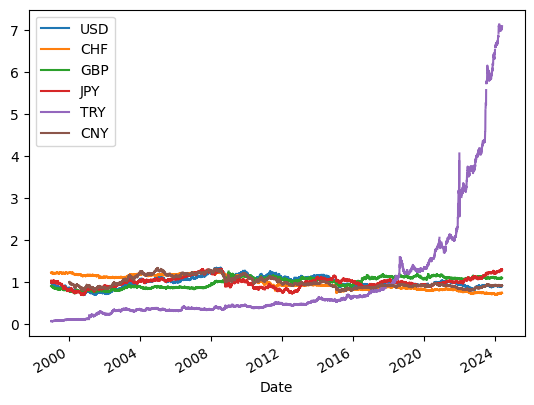

In [29]:
df.div(df.mean()).plot();

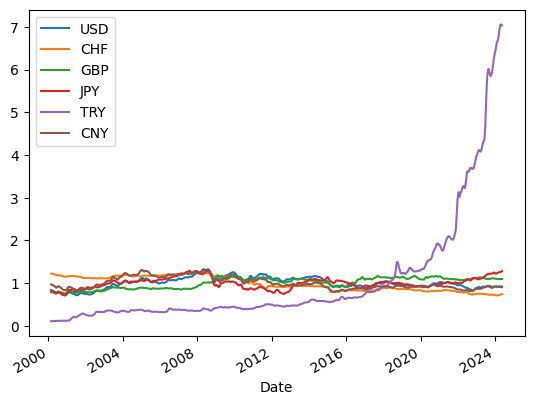

In [39]:
(df.dropna()/df.mean()).rolling(30).mean().plot();

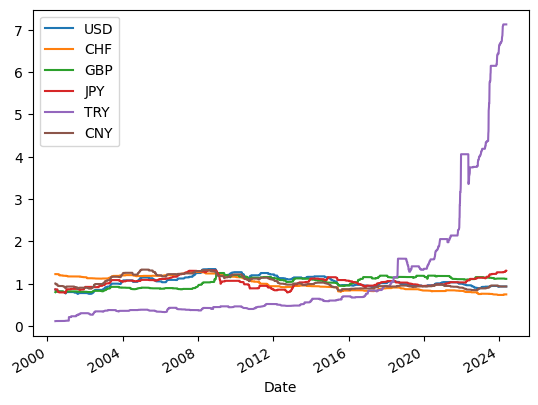

In [40]:
(df.dropna()/df.mean()).rolling(100).max().plot();

In [42]:
df.iloc[-1]

USD      1.0832
CHF      0.9800
GBP      0.8584
JPY    168.4300
TRY     34.9765
CNY      7.8212
Name: 2024-05-15 00:00:00, dtype: float64

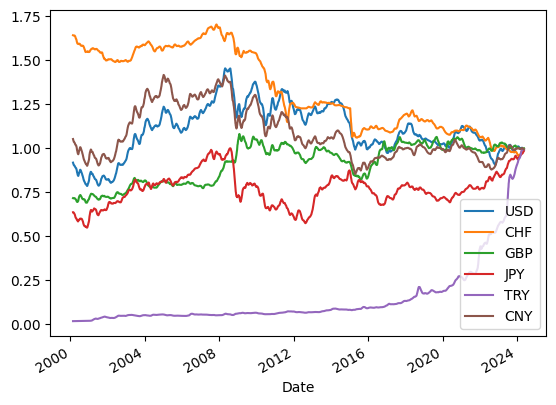

In [43]:
(df.dropna()/df.iloc[-1]).rolling(30).mean().plot();

In [44]:
df = df.dropna()

df

,USD,CHF,GBP,JPY,TRY,CNY
Date,,,,,,
2000-01-13,1.0276,1.6111,0.62550,108.89,0.5555,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,0.5536,8.4632
2000-01-17,1.0094,1.6136,0.61800,105.81,0.5523,8.3548
2000-01-18,1.0093,1.6131,0.61740,106.42,0.5521,8.3540
2000-01-19,1.0105,1.6120,0.61720,106.99,0.5523,8.3639
...,...,...,...,...,...,...
2024-05-09,1.0732,0.9760,0.85995,167.32,34.5811,7.7554
2024-05-10,1.0779,0.9779,0.86055,167.87,34.7431,7.7877
2024-05-13,1.0795,0.9784,0.86023,168.25,34.7702,7.8095


In [47]:
dates = pd.date_range(df.index.min(), df.index.max())
df = df.reindex(dates)
df

,USD,CHF,GBP,JPY,TRY,CNY
2000-01-13,1.0276,1.6111,0.62550,108.89,0.5555,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,0.5536,8.4632
2000-01-15,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-16,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-17,1.0094,1.6136,0.61800,105.81,0.5523,8.3548
...,...,...,...,...,...,...
2024-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-12,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-13,1.0795,0.9784,0.86023,168.25,34.7702,7.8095
2024-05-14,1.0796,0.9801,0.85983,168.89,34.8169,7.8103


In [50]:
df.ffill()

,USD,CHF,GBP,JPY,TRY,CNY
2000-01-13,1.0276,1.6111,0.62550,108.89,0.5555,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,0.5536,8.4632
2000-01-15,1.0225,1.6130,0.62210,108.05,0.5536,8.4632
2000-01-16,1.0225,1.6130,0.62210,108.05,0.5536,8.4632
2000-01-17,1.0094,1.6136,0.61800,105.81,0.5523,8.3548
...,...,...,...,...,...,...
2024-05-11,1.0779,0.9779,0.86055,167.87,34.7431,7.7877
2024-05-12,1.0779,0.9779,0.86055,167.87,34.7431,7.7877
2024-05-13,1.0795,0.9784,0.86023,168.25,34.7702,7.8095
2024-05-14,1.0796,0.9801,0.85983,168.89,34.8169,7.8103


In [51]:
df.bfill()

,USD,CHF,GBP,JPY,TRY,CNY
2000-01-13,1.0276,1.6111,0.62550,108.89,0.5555,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,0.5536,8.4632
2000-01-15,1.0094,1.6136,0.61800,105.81,0.5523,8.3548
2000-01-16,1.0094,1.6136,0.61800,105.81,0.5523,8.3548
2000-01-17,1.0094,1.6136,0.61800,105.81,0.5523,8.3548
...,...,...,...,...,...,...
2024-05-11,1.0795,0.9784,0.86023,168.25,34.7702,7.8095
2024-05-12,1.0795,0.9784,0.86023,168.25,34.7702,7.8095
2024-05-13,1.0795,0.9784,0.86023,168.25,34.7702,7.8095
2024-05-14,1.0796,0.9801,0.85983,168.89,34.8169,7.8103


In [52]:
df.interpolate()

,USD,CHF,GBP,JPY,TRY,CNY
2000-01-13,1.027600,1.611100,0.625500,108.890000,0.555500,8.505400
2000-01-14,1.022500,1.613000,0.622100,108.050000,0.553600,8.463200
2000-01-15,1.018133,1.613200,0.620733,107.303333,0.553167,8.427067
2000-01-16,1.013767,1.613400,0.619367,106.556667,0.552733,8.390933
2000-01-17,1.009400,1.613600,0.618000,105.810000,0.552300,8.354800
...,...,...,...,...,...,...
2024-05-11,1.078433,0.978067,0.860443,167.996667,34.752133,7.794967
2024-05-12,1.078967,0.978233,0.860337,168.123333,34.761167,7.802233
2024-05-13,1.079500,0.978400,0.860230,168.250000,34.770200,7.809500
2024-05-14,1.079600,0.980100,0.859830,168.890000,34.816900,7.810300


In [57]:
import sparklines

print(sparklines.sparklines(pd.Series(range(8)))[0])

▁▂▃▄▅▆▇█


In [58]:
sparklines.sparklines(pd.Series(range(8)))[0]

'▁▂▃▄▅▆▇█'

In [63]:
(df
# .groupby(pd.Grouper(freq='A'))
 .resample("YE")
 .agg(USD=('USD', lambda s_: s_.mean().round(3)),
      trend_USD=('USD', lambda s_: sparklines.sparklines(s_.resample('QE').mean())[0]))
)

,USD,trend_USD
2000-12-31,0.920,█▅▃▁
2001-12-31,0.896,█▁▃▄
2002-12-31,0.946,▁▃▇█
2003-12-31,1.131,▁▅▄█
2004-12-31,1.244,▄▁▂█
2005-12-31,1.244,█▅▃▁
2006-12-31,1.256,▁▆▇█
2007-12-31,1.370,▁▃▄█
2008-12-31,1.471,▆█▆▁
2009-12-31,1.395,▁▃▆█


In [68]:
df = pd.read_csv("./data/ListeOF.zip")

/tmp/ipykernel_9676/3102012505.py:1: DtypeWarning: Columns (5,6,7,52,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/ListeOF.zip")


In [74]:
df.isna().sum().to_frame().style.bar(color="red")

,0
numero_de_da,0
form_total,15456
da_siren,0
da_no_etab,6569
da_raison_sociale,0
sf1,12674
nsf1,12684
nhsf1,12684
sf2,20663
nsf2,20669


In [75]:
df.notna().sum().to_frame().style.bar(color="lightgreen")

,0
numero_de_da,86948
form_total,71492
da_siren,86948
da_no_etab,80379
da_raison_sociale,86948
sf1,74274
nsf1,74264
nhsf1,74264
sf2,66285
nsf2,66279
